In [115]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
import pandas as pd


In [116]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [117]:
x_train.shape

(50000, 32, 32, 3)

In [118]:
x_train[0].shape

(32, 32, 3)

In [119]:
x_test.shape

(10000, 32, 32, 3)

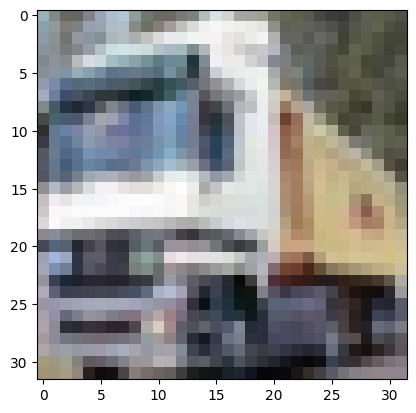

In [120]:
plt.imshow(x_train[1])

In [121]:
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

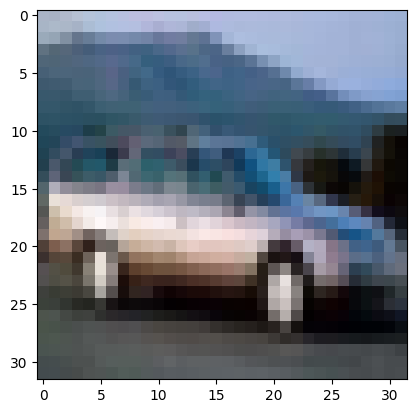

In [122]:
plt.imshow(x_train[4])

In [123]:
def approach1():
    encoder_input = keras.Input(shape=(32,32,3), name= "img")
    x = keras.layers.Flatten()(encoder_input)
    encoder_output = keras.layers.Dense(128, activation="relu")(x)

    encoder = keras.Model(encoder_input,encoder_output, name="encoder")

    decoder_input = keras.layers.Dense(3072, activation="relu")(encoder_output)
    decoder_ouput = keras.layers.Reshape((32,32,3))(decoder_input)

    # decoder = keras.Model(decoder_input,decoder_ouput, name="decoder")

    opt = keras.optimizers.Adam(learning_rate=0.001)

    autoencoder = keras.Model(encoder_input, decoder_ouput, name="autoencoder")
    autoencoder.summary()

    autoencoder.compile(opt, loss="mse")
    autoencoder.fit(x_train, x_train, epochs=3, batch_size=32, validation_split=0.1) 




In [139]:

    #define the input shape
    input_img = Input(shape = (32, 32, 3))

    x = Conv2D(64, (3, 3), activation='relu', padding='same') (input_img)
    x = MaxPooling2D((2, 2)) (x)

    x = Conv2D(32, (3, 3), activation='relu', padding='same') (x)
    x = MaxPooling2D((2, 2)) (x)

    x = Conv2D(16, (3, 3), activation='relu', padding='same') (x)
    #x = MaxPooling2D((2, 2)) (x)

    x = Conv2D(8, (3, 3), activation='relu', padding='same') (x)
    encoded = MaxPooling2D((2, 2)) (x)

    x = Conv2D(8, (3, 3), activation='relu', padding='same') (encoded)
    x = UpSampling2D((2, 2)) (x)

    x = Conv2D(16, (3, 3), activation='relu', padding='same') (x)
    x = UpSampling2D((2, 2)) (x)

    x = Conv2D(32, (3, 3), activation='relu', padding='same') (x)
    x = UpSampling2D((2, 2)) (x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same') (x)
    #x = UpSampling2D((2, 2)) (x)

    decoded = Conv2D(3, (3, 3), padding='same') (x)

    cae = Model(input_img,decoded)
    cae.compile(optimizer = 'adam', loss ='mse', metrics=['accuracy'] )
    cae.summary()
    cae.fit(x_train,x_train,
           epochs = 10,
           batch_size = 50,
           validation_data = (x_test, x_test),
           )

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_28 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 8, 8, 16)          4624

In [125]:
# example = encoder.predict([x_test[0].reshape(-1,32,32,3)])[0]
# print(example)

In [126]:
# example.shape

In [127]:
# plt.imshow(example.reshape(8,8))

In [128]:
# ae_out = autoencoder.predict([x_test[1].reshape(-1,32,32,3)])[0]
# print(ae_out.shape)

In [129]:
# plt.imshow(x_test[1])

In [130]:
# plt.imshow(ae_out)

In [131]:
# plt.imshow(x_test[6])

In [132]:
# ae_out2 = autoencoder.predict([x_test[6].reshape(-1,32,32,3)])[0]

In [133]:
# plt.imshow(ae_out2)

In [134]:
# example2 = encoder.predict([x_test[6].reshape(-1,32,32,3)])[0]

In [135]:
# plt.imshow(example2.reshape(8,16))

In [137]:
# # Visualize history
# # Plot history: Loss
# plt.plot(history.history['val_loss'])
# plt.title('Validation loss history')
# plt.ylabel('Loss value')
# plt.xlabel('No. epoch')
# plt.show()

# # Plot history: Accuracy
# plt.plot(history.history['val_accuracy'])
# plt.title('Validation accuracy history')
# plt.ylabel('Accuracy value (%)')
# plt.xlabel('No. epoch')
# plt.show()

In [138]:
decoded_data = []
for i in range(20):
    decoded_data.append(cae.predict(x_test[i]))

for i in len(decoded_data):
    plt.imshow(i)

NameError: name 'cae' is not defined

In [143]:
def display_images(original, decoded, count = 10): 
    n = count
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # show original input image
        ax = plt.subplot(2, n, i+1)
        plt.imshow(original[300*i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display decoded image
        ax = plt.subplot(2, n, i +1 + n)
        plt.imshow(decoded[300*i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    

313/313 [==============================] - 8s 24ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


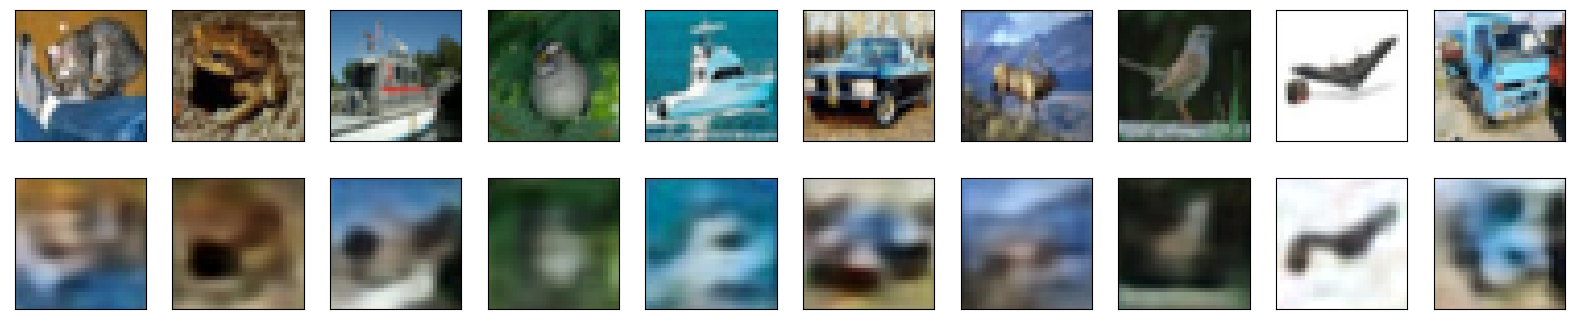

In [144]:

decoded_data = cae.predict(x_test)
display_images(x_test, decoded_data)